In [17]:
!pip install keras-tuner -qq

     |████████████████████████████████| 71kB 9.0MB/s 



# KerasTuner
The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images = train_images.astype("float32")/255.0
test_images = test_images.astype("float32")/255.0

In [7]:
train_images[0].shape

(28, 28)

In [13]:
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [14]:
def build_model(hp):
 
  model = keras.Sequential([
 
    keras.layers.Conv2D(
      filters=hp.Int("conv_1_filter", min_value=32, max_value=128, step=16),
      kernel_size=hp.Choice("conv_1_kernel", values = [3,5]),
      activation="relu",
      input_shape=(28, 28, 1)
    ),
 
    keras.layers.Conv2D(
      filters =hp.Int("conv_2_filter", min_value=32, max_value=64, step=16),
      kernel_size=hp.Choice("conv_2_kernel", values = [3,5]),
      activation = "relu"
    ),
 
    keras.layers.Flatten(),
 
    keras.layers.Dense(
      units=hp.Int("dense_1_units", min_value=32, max_value=128, step=16),
      activation = 'relu'
    ),
 
    keras.layers.Dense(10, activation = "softmax")
    ])
 
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice("learning_rate",
                                                            values= [1e-2, 1e-3])),
      loss= 'sparse_categorical_crossentropy',
      metrics=["accuracy"])
  return model


Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn.

# Let Use the RamdomSearch

In [19]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [20]:
tuner_search = RandomSearch(build_model,
objective = "val_accuracy",
max_trials = 5, 
directory = 'output',
project_name = 'MNIST Fashion')
# max trials number of times to cv yh...

In [21]:
tuner_search.search(train_images, train_labels, epochs=2, validation_split=0.1)

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.09849999845027924

Best val_accuracy So Far: 0.8151666522026062
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner_search.get_best_models(num_models=5)

# Let pick the best model hyperparameter to train on our train set

In [23]:
model = tuner_search.get_best_models(num_models=1)[0]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        57648     
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                1858640   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 1,917,578
Trainable params: 1,917,578
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(train_images, train_labels, epochs=10, validation_split =0.1,
          initial_epoch = 3)
# Intial_epoch can be our starting epoch...

Epoch 4/10
1688/1688 [==============================] - 302s 179ms/step - loss: 0.2369 - accuracy: 0.9126 - val_loss: 0.2674 - val_accuracy: 0.9028
Epoch 5/10
1688/1688 [==============================] - 298s 176ms/step - loss: 0.1980 - accuracy: 0.9269 - val_loss: 0.2899 - val_accuracy: 0.9002
Epoch 6/10
1688/1688 [==============================] - 298s 176ms/step - loss: 0.1645 - accuracy: 0.9389 - val_loss: 0.2783 - val_accuracy: 0.9062
Epoch 7/10
1688/1688 [==============================] - 297s 176ms/step - loss: 0.1387 - accuracy: 0.9479 - val_loss: 0.2758 - val_accuracy: 0.9163
Epoch 8/10
1688/1688 [==============================] - 297s 176ms/step - loss: 0.1126 - accuracy: 0.9587 - val_loss: 0.2995 - val_accuracy: 0.9135
Epoch 9/10
1688/1688 [==============================] - 298s 177ms/step - loss: 0.0928 - accuracy: 0.9647 - val_loss: 0.3223 - val_accuracy: 0.9085
Epoch 10/10
1688/1688 [==============================] - 299s 177ms/step - loss: 0.0767 - accuracy: 0.9716 - val

In [35]:
train_images[0].shape

(28, 28, 1)

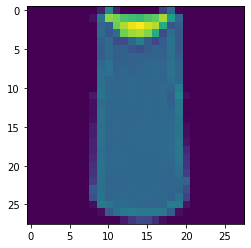

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
#for i in range(3):
  #plt.subplots(28+1+i)
  #print(train_labels[i])
plt.imshow(array_to_img(train_images[2]))
plt.show()